In [56]:
import datetime
import pandas as pd
df = pd.read_csv(r'C:\Users\sebas\Desktop\Github\Programming\UCL\Software Udvikling\Deep Learning\20Feb\ferry exercise_student.csv')


<AxesSubplot:>

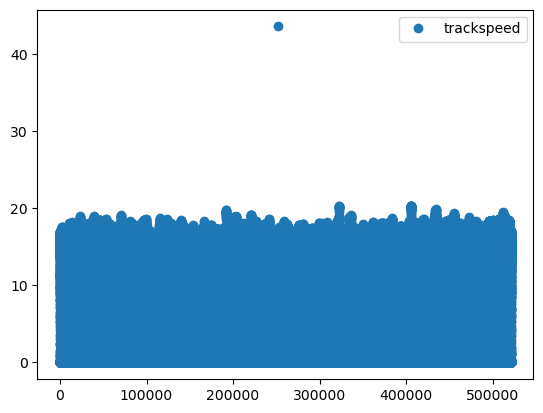

In [57]:
df.plot(y='trackspeed', style='o')

In [58]:
# t: thrusters
# a: angle on the thrusters
print(df.shape)
df.isnull().sum()

(521029, 12)


Unnamed: 0     0
timestamp     56
longitude     58
latitude      45
t1             0
t2             0
t3             0
t4            43
a1            47
a3            47
head          52
trackspeed     0
dtype: int64

In [59]:
df[df['timestamp'].isnull()]
df.timestamp = pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S%Z',  errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521029 entries, 0 to 521028
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  521029 non-null  int64  
 1   timestamp   520973 non-null  object 
 2   longitude   520971 non-null  float64
 3   latitude    520984 non-null  float64
 4   t1          521029 non-null  float64
 5   t2          521029 non-null  float64
 6   t3          521029 non-null  float64
 7   t4          520986 non-null  float64
 8   a1          520982 non-null  float64
 9   a3          520982 non-null  float64
 10  head        520977 non-null  float64
 11  trackspeed  521029 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 47.7+ MB


In [60]:
df.dropna(subset=['timestamp'], inplace=True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace=True)
df['latitude'].fillna(value=df['latitude'].mean(), inplace=True)
df['t4'].fillna(value=df['t4'].mean(), inplace=True)
df['a1'].fillna(value=df['a1'].mean(), inplace=True)
df['a3'].fillna(value=df['a3'].mean(), inplace=True)
df['head'].fillna(value=df['head'].mean(), inplace=True)
print(df.shape)
df.isnull().sum()

(520973, 12)


Unnamed: 0    0
timestamp     0
longitude     0
latitude      0
t1            0
t2            0
t3            0
t4            0
a1            0
a3            0
head          0
trackspeed    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520973 entries, 0 to 521028
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  520973 non-null  int64  
 1   timestamp   520973 non-null  object 
 2   longitude   520973 non-null  float64
 3   latitude    520973 non-null  float64
 4   t1          520973 non-null  float64
 5   t2          520973 non-null  float64
 6   t3          520973 non-null  float64
 7   t4          520973 non-null  float64
 8   a1          520973 non-null  float64
 9   a3          520973 non-null  float64
 10  head        520973 non-null  float64
 11  trackspeed  520973 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 51.7+ MB


In [62]:
df['stopped'] = df.apply(lambda x: True if x['trackspeed'] == 0 else False, axis=1)
df = df.drop(labels = 'trackspeed', axis=1)
df.iloc[0:20]

,Unnamed: 0,timestamp,longitude,latitude,t1,t2,t3,t4,a1,a3,head,stopped
0,0,2020-09-10 19:30:00+02:00,10.896467,54.911233,292.8,180.0,320.1,293.0,177.0,179.0,114.52,False
1,1,2020-09-10 19:30:30+02:00,10.898900,54.910300,304.8,178.4,316.8,293.0,179.0,179.0,114.87,False
2,2,2020-09-10 19:31:00+02:00,10.901333,54.909367,306.0,184.8,314.6,291.0,181.0,179.0,115.40,False
3,3,2020-09-10 19:31:30+02:00,10.903750,54.908433,301.2,181.6,319.0,294.0,181.0,179.0,116.28,False
4,4,2020-09-10 19:32:00+02:00,10.906150,54.907467,303.6,183.2,319.0,292.0,179.0,179.0,116.10,False
5,5,2020-09-10 19:32:30+02:00,10.908550,54.906500,303.6,181.6,320.1,294.0,180.0,179.0,116.02,False
6,6,2020-09-10 19:33:00+02:00,10.910950,54.905550,303.6,180.0,317.9,294.0,181.0,179.0,116.37,False
7,7,2020-09-10 19:33:30+02:00,10.913333,54.904583,308.4,184.0,316.8,293.0,174.0,179.0,116.46,False
8,8,2020-09-10 19:34:00+02:00,10.915717,54.903600,309.6,188.0,320.1,289.0,183.0,179.0,119.44,False
9,9,2020-09-10 19:34:30+02:00,10.918017,54.902533,296.4,175.2,311.3,288.0,181.0,179.0,121.20,False


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:, 2:-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1, solver='liblinear', multi_class='ovr')

lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9611934814262328
Test accuracy: 0.9610344739334067
